In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from warnings import filterwarnings
pd.set_option("display.float_format", lambda x:"%.2f" %x)
sns.set(color_codes=True)
sns.set_palette("deep")
%matplotlib inline
filterwarnings("ignore")

# Wholesale Customer Data

In [230]:
wcad = pd.read_csv("Wholesale Customers Data.csv")

<b>Exploratory Data Analysis

In [231]:
wcad.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [232]:
wcad.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [233]:
wcad.shape

(440, 9)

In [234]:
wcad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


## <b>Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [235]:
wcad.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.00,NaN,NaN,NaN,220.50,127.16,1.00,110.75,220.50,330.25,440.00
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.00,NaN,NaN,NaN,12000.30,12647.33,3.00,3127.75,8504.00,16933.75,112151.00
Milk,440.00,NaN,NaN,NaN,5796.27,7380.38,55.00,1533.00,3627.00,7190.25,73498.00
Grocery,440.00,NaN,NaN,NaN,7951.28,9503.16,3.00,2153.00,4755.50,10655.75,92780.00
Frozen,440.00,NaN,NaN,NaN,3071.93,4854.67,25.00,742.25,1526.00,3554.25,60869.00
Detergents_Paper,440.00,NaN,NaN,NaN,2881.49,4767.85,3.00,256.75,816.50,3922.00,40827.00
Delicatessen,440.00,NaN,NaN,NaN,1524.87,2820.11,3.00,408.25,965.50,1820.25,47943.00


In [236]:
wcad["Total_Spending"] = wcad["Fresh"]+wcad["Milk"]+wcad["Grocery"]+wcad["Frozen"]+wcad["Detergents_Paper"]+wcad["Delicatessen"]

In [237]:
wcad.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [238]:
wcadregspend=wcad.groupby("Region")

In [240]:
wcadregspend.sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


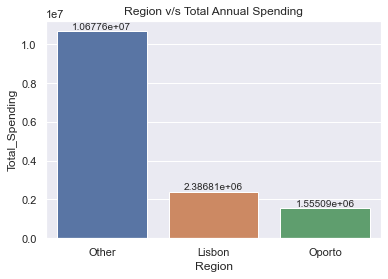

In [243]:
ax = sns.barplot(x="Region",y='Total_Spending',data = wcad,ci=None,estimator=np.sum);
ax.bar_label(ax.containers[0]);
plt.title("Region v/s Total Annual Spending");

In [244]:
wcadchanspend=wcad.groupby("Channel")

In [247]:
wcadchanspend.sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


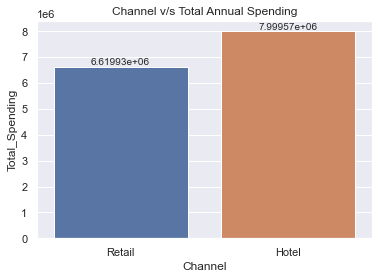

In [249]:
ax = sns.barplot(x="Channel",y='Total_Spending',data = wcad,ci=None,estimator=np.sum);
ax.bar_label(ax.containers[0]);
plt.title("Channel v/s Total Annual Spending");

<b>Alternate way using cross tab

In [87]:
ct=pd.crosstab(wcad["Region"],wcad["Channel"],values=wcad["Total_Spending"],aggfunc=np.sum)
ct["RegTotal"]=ct["Hotel"]+ct["Retail"]
ct.loc[len(ct.index)]=ct.loc["Lisbon"]+ct.loc["Oporto"]+ct.loc["Other"]
ct.rename(index={3:"ChanTotal"},inplace=True)
ct

Channel,Hotel,Retail,RegTotal
Region,,,
Lisbon,1538342,848471,2386813
Oporto,719150,835938,1555088
Other,5742077,4935522,10677599
ChanTotal,7999569,6619931,14619500


## There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [88]:
wcadregspend.describe()

Buyer/Spender                                                   Fresh  \
               count   mean    std    min    25%    50%    75%    max  count   
Region                                                                         
Lisbon         77.00 235.00  22.37 197.00 216.00 235.00 254.00 273.00  77.00   
Oporto         47.00 317.00  13.71 294.00 305.50 317.00 328.50 340.00  47.00   
Other         316.00 202.61 143.62   1.00  79.75 158.50 361.25 440.00 316.00   

                 ... Delicatessen          Total_Spending                    \
           mean  ...          75%      max          count     mean      std   
Region           ...                                                          
Lisbon 11101.73  ...      1775.00  6854.00          77.00 30997.57 20321.81   
Oporto  9887.68  ...      1538.50  5609.00          47.00 33086.98 24234.51   
Other  12533.47  ...      1832.75 47943.00         316.00 33789.87 27949.34   

                                                     
           min      25%      50%      75%       max  
Region                                               
Lisbon 4925.00 17184.00 25385.00 38699.00 107155.00  
Oporto 4129.00 20611.50 26953.00 36158.50 130877.00  
Other   904.00 17209.25 28029.00 42492.25 199891.00  

[3 rows x 64 columns]

In [89]:
wcadchanspend.describe()

Buyer/Spender                                                 Fresh  \
                count   mean    std  min    25%    50%    75%    max  count   
Channel                                                                       
Hotel          298.00 238.37 120.91 4.00 137.25 241.50 344.50 440.00 298.00   
Retail         142.00 183.00 132.14 1.00  61.25 166.50 303.75 438.00 142.00   

                  ... Delicatessen          Total_Spending                    \
            mean  ...          75%      max          count     mean      std   
Channel           ...                                                          
Hotel   13475.56  ...      1548.00 47943.00         298.00 26844.19 22164.84   
Retail   8904.32  ...      2156.00 16523.00         142.00 46619.23 29346.87   

                                                       
             min      25%      50%      75%       max  
Channel                                                
Hotel     904.00 13859.25 21254.50 32113.75 190169.00  
Retail  14993.00 30147.25 37139.00 51650.50 199891.00  

[2 rows x 64 columns]

## On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [250]:
wcad.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [251]:
Fresh = round(stats.variation(wcad.iloc[0:,3]),2)
Milk = round(stats.variation(wcad.iloc[0:,4]),2)
Grocery = round(stats.variation(wcad.iloc[0:,5]),2)
Frozen = round(stats.variation(wcad.iloc[0:,6]),2)
Det_Pap = round(stats.variation(wcad.iloc[0:,7]),2)
delicatessen = round(stats.variation(wcad.iloc[0:,8]),2)

In [252]:
a=pd.DataFrame({"Variety":("Fresh","Milk","Grocery","Frozen","Det_Pap","delicatessen"), "CV":(Fresh,Milk,Grocery,Frozen,Det_Pap,delicatessen)},index=["First","Second","Third","Fourth", "Fifth","Sixth"])

In [253]:
a

,Variety,CV
First,Fresh,1.05
Second,Milk,1.27
Third,Grocery,1.19
Fourth,Frozen,1.58
Fifth,Det_Pap,1.65
Sixth,delicatessen,1.85


In [254]:
a.sort_values(by="CV",inplace = True)

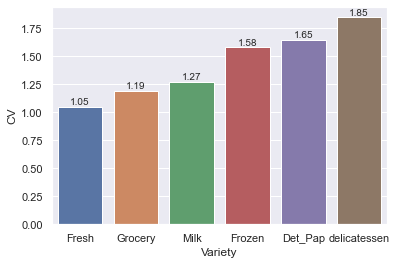

In [255]:
cvplot = sns.barplot(x="Variety",y="CV",data=a);
cvplot.bar_label(cvplot.containers[0]);

## Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

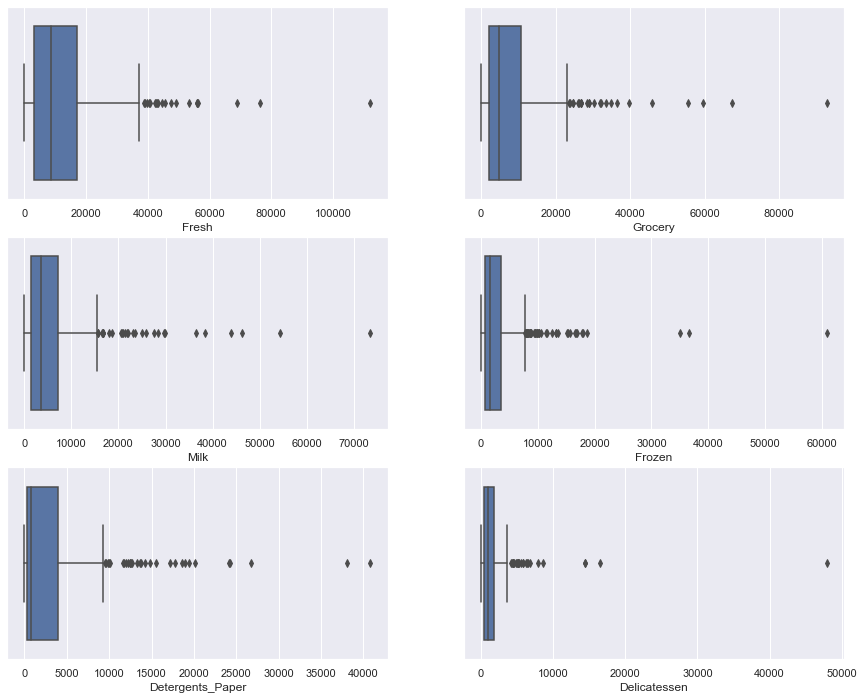

In [96]:
plt.figure(figsize=(15,12));
plt.subplot(3,2,1);
sns.boxplot(x="Fresh",data=wcad);
plt.subplot(3,2,2);
sns.boxplot(x="Grocery",data=wcad);
plt.subplot(3,2,3);
sns.boxplot(x="Milk",data=wcad);
plt.subplot(3,2,4);
sns.boxplot(x="Frozen",data=wcad);
plt.subplot(3,2,5);
sns.boxplot(x="Detergents_Paper",data=wcad);
plt.subplot(3,2,6);
sns.boxplot(x="Delicatessen",data=wcad);

# CMSU UG SURVEY

In [97]:
survey = pd.read_csv("Survey-1.csv")

<b>Exploratory Data Analysis

In [98]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [99]:
survey.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.40,Part-Time,40.00,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.90,Part-Time,40.00,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.50,Part-Time,55.00,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.50,Part-Time,30.00,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.20,Part-Time,70.00,2,3,250,Laptop,0


In [100]:
survey.shape

(62, 14)

In [101]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## For this data, construct the following contingency tables (Keep Gender as row variable)

### Gender and Major

In [102]:
ct1=pd.crosstab(survey["Gender"],survey["Major"])
ct1["Gender_Total"] = ct1["Accounting"]+ct1["CIS"]+ct1["Economics/Finance"]+ct1["International Business"]+ct1["Management"]+ct1["Other"]+ct1["Retailing/Marketing"]+ct1["Undecided"]
ct1.loc[len(ct1.index)]=ct1.loc["Female"]+ct1.loc["Male"]
ct1.rename(index={2:"Major_Total"},inplace=True)
ct1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Gender_Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Major_Total,7,4,11,6,10,7,14,3,62


### Gender and Grad Intention

In [103]:
ct2=pd.crosstab(survey["Gender"],survey["Grad Intention"])
ct2["Gender_Total"] = ct2["No"]+ct2["Undecided"]+ct2["Yes"]
ct2.loc[len(ct2.index)]=ct2.loc["Female"]+ct2.loc["Male"]
ct2.rename(index={2:"Grad Intention_Total"},inplace=True)
ct2


Grad Intention,No,Undecided,Yes,Gender_Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Grad Intention_Total,12,22,28,62


### Gender and Employment

In [104]:
ct3=pd.crosstab(survey["Gender"],survey["Employment"])
ct3["Gender_Total"] = ct3["Full-Time"]+ct3["Part-Time"]+ct3["Unemployed"]
ct3.loc[len(ct3.index)]=ct3.loc["Female"]+ct3.loc["Male"]
ct3.rename(index={2:"Employment_Total"},inplace=True)
ct3

Employment,Full-Time,Part-Time,Unemployed,Gender_Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Employment_Total,10,43,9,62


### Gender and Computer

In [105]:
ct4=pd.crosstab(survey["Gender"],survey["Computer"])
ct4["Gender_Total"] = ct4["Desktop"]+ct4["Laptop"]+ct4["Tablet"]
ct4.loc[len(ct4.index)]=ct4.loc["Female"]+ct4.loc["Male"]
ct4.rename(index={2:"Computer_Total"},inplace=True)
ct4

Computer,Desktop,Laptop,Tablet,Gender_Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Computer_Total,5,55,2,62


## Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### What is the probability that a randomly selected CMSU student will be male?

In [106]:
ct1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Gender_Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Major_Total,7,4,11,6,10,7,14,3,62


In [114]:
p_male = ct1.iloc[1,8]/ct1.iloc[2,8]
round(p_male,2)

0.47

### What is the probability that a randomly selected CMSU student will be female?

In [115]:
p_female = ct1.iloc[0,8]/ct1.iloc[2,8]
round(p_female,2)

0.53

## Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### Find the conditional probability of different majors among the male students in CMSU.

In [109]:
ct1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Gender_Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Major_Total,7,4,11,6,10,7,14,3,62


In [110]:
p_acc_male = ct1.iloc[1,0]/ct1.iloc[1,8]
p_acc_male
p_cis_male = ct1.iloc[1,1]/ct1.iloc[1,8]
p_cis_male
p_ecfi_male = ct1.iloc[1,2]/ct1.iloc[1,8]
p_ecfi_male
p_ib_male = ct1.iloc[1,3]/ct1.iloc[1,8]
p_ib_male
p_mgt_male = ct1.iloc[1,4]/ct1.iloc[1,8]
p_mgt_male
p_oth_male = ct1.iloc[1,5]/ct1.iloc[1,8]
p_oth_male
p_rma_male = ct1.iloc[1,6]/ct1.iloc[1,8]
p_rma_male
p_und_male = ct1.iloc[1,7]/ct1.iloc[1,8]
p_und_male
cond_maj_index = ["P(Acc|male)","P(CIS|male)","P(ECFI|male)","P(IB|male)","P(MGT|male)","P(Oth|male)","P(RMA|male)","P(Und|male)"]
cond_maj_values = [p_acc_male,p_cis_male,p_ecfi_male,p_ib_male,p_mgt_male,p_oth_male,p_rma_male,p_und_male]
cond_maj = pd.DataFrame(data=cond_maj_values, index=cond_maj_index)
cond_maj.rename(columns={0:"Conditional Probability"},inplace=True)
cond_maj

,Conditional Probability
P(Acc|male),0.14
P(CIS|male),0.03
P(ECFI|male),0.14
P(IB|male),0.07
P(MGT|male),0.21
P(Oth|male),0.14
P(RMA|male),0.17
P(Und|male),0.10


### Find the conditional probability of different majors among the female students of CMSU

In [111]:
p_acc_female = ct1.iloc[0,0]/ct1.iloc[0,8]
p_acc_female
p_cis_female = ct1.iloc[0,1]/ct1.iloc[0,8]
p_cis_female
p_ecfi_female = ct1.iloc[0,2]/ct1.iloc[0,8]
p_ecfi_female
p_ib_female = ct1.iloc[0,3]/ct1.iloc[0,8]
p_ib_female
p_mgt_female = ct1.iloc[0,4]/ct1.iloc[0,8]
p_mgt_female
p_oth_female = ct1.iloc[0,5]/ct1.iloc[0,8]
p_oth_female
p_rma_female = ct1.iloc[0,6]/ct1.iloc[0,8]
p_rma_female
p_und_female = ct1.iloc[0,7]/ct1.iloc[0,8]
p_und_female
cond_maj_index_female = ["P(Acc|female)","P(CIS|female)","P(ECFI|female)","P(IB|female)","P(MGT|female)","P(Oth|female)","P(RMA|female)","P(Und|female)"]
cond_maj_values_female = [p_acc_female,p_cis_female,p_ecfi_female,p_ib_female,p_mgt_female,p_oth_female,p_rma_female,p_und_female]
cond_maj_female = pd.DataFrame(data=cond_maj_values_female, index=cond_maj_index_female)
cond_maj_female.rename(columns={0:"Conditional Probability"},inplace=True)
cond_maj_female

,Conditional Probability
P(Acc|female),0.09
P(CIS|female),0.09
P(ECFI|female),0.21
P(IB|female),0.12
P(MGT|female),0.12
P(Oth|female),0.09
P(RMA|female),0.27
P(Und|female),0.00


## Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### Find the probability That a randomly chosen student is a male and intends to graduate.

In [112]:
ct2

Grad Intention,No,Undecided,Yes,Gender_Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Grad Intention_Total,12,22,28,62


In [116]:
p_male_intgrad = ct2.iloc[1,2]/ct2.iloc[2,3]
round(p_male_intgrad,2)

0.27

### Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [117]:
ct4

Computer,Desktop,Laptop,Tablet,Gender_Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Computer_Total,5,55,2,62


In [120]:
p_female_nolap = (ct4.iloc[0,0] + ct4.iloc[0,2]) /ct4.iloc[2,3]
round(p_female_nolap,2)

0.06

##  Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### Find the probability that a randomly chosen student is a male or has full-time employment?

In [121]:
ct3

Employment,Full-Time,Part-Time,Unemployed,Gender_Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Employment_Total,10,43,9,62


In [122]:
p_male = ct3.iloc[1,3]/ct3.iloc[2,3]
p_fulltime = ct3.iloc[2,0]/ct3.iloc[2,3]
p_male_fulltime = ct3.iloc[1,0]/ct3.iloc[2,3]
p_male_or_ft = p_male + p_fulltime - p_male_fulltime
round(p_male_or_ft,2)

0.52

### Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [123]:
ct1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Gender_Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Major_Total,7,4,11,6,10,7,14,3,62


In [127]:
p_female_ib_mgt = (ct1.iloc[0,3] + ct1.iloc[0,4]) /ct1.iloc[2,8]
p_female_ib_mgt_givFem = p_female_ib_mgt/p_female
p_female_ib_mgt_givFem

0.24242424242424243

##  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [139]:
survey_grad = survey[(survey["Grad Intention"]=="Yes") | (survey["Grad Intention"]=="No")]
survey_grad.head(1)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200


In [138]:
survey_grad["Grad Intention"].unique()

array(['Yes', 'No'], dtype=object)

In [140]:
newct2=pd.crosstab(survey_grad["Gender"],survey_grad["Grad Intention"])
newct2["Gender_Total"] = newct2["No"]+newct2["Yes"]
newct2.loc[len(newct2.index)]=newct2.loc["Female"]+newct2.loc["Male"]
newct2.rename(index={2:"Grad Intention_Total"},inplace=True)
newct2

Grad Intention,No,Yes,Gender_Total
Gender,,,
Female,9,11,20
Male,3,17,20
Grad Intention_Total,12,28,40


In [145]:
p_newf = newct2.iloc[0,2]/newct2.iloc[2,2]
p_yes = newct2.iloc[2,1]/newct2.iloc[2,2]
p_newf_yes = newct2.iloc[0,1]/newct2.iloc[2,2]
RHS = p_newf*p_yes
if(p_newf_yes == RHS):
    print("The 2 events are independent")
else:
    print("The 2 events are not independent")

The 2 events are not independent


## Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

### If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [146]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [157]:
survey_3andless = survey[survey["GPA"]<3]
survey_3andless.head(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200


In [153]:
survey_3andless["GPA"].unique()

array([2.9, 2.5, 2.8, 2.3, 2.6, 2.4])

In [155]:
len(survey_3andless["GPA"])

17

In [160]:
p_lessthan3 = (len(survey_3andless["GPA"]))/(len(survey["GPA"]))
round(p_lessthan3,2)

0.27

### Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [169]:
survey_male50more = survey[(survey["Gender"]=="Male")&(survey["Salary"]>=50)]
survey_male50more.head(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
14,15,Male,21,Senior,Management,Yes,3.20,Part-Time,54.00,3,4,600,Laptop,400
17,18,Male,21,Junior,Economics/Finance,Undecided,3.10,Part-Time,55.00,2,3,600,Laptop,300


In [170]:
len(survey_male50more["Salary"])

14

In [171]:
surveym50 = survey[survey["Salary"]>=50]
surveym50.head(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.30,Unemployed,78.00,3,2,700,Laptop,30


In [173]:
len(surveym50["Salary"])

32

In [174]:
p_malegivemorethan50 = len(survey_male50more["Salary"])/len(surveym50["Salary"])
p_malegivemorethan50

0.4375

In [175]:
survey_female50more = survey[(survey["Gender"]=="Female")&(survey["Salary"]>=50)]
survey_female50more.head(2)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.30,Unemployed,78.00,3,2,700,Laptop,30


In [176]:
len(survey_female50more["Salary"])

18

In [177]:
p_femalegivemorethan50 = len(survey_female50more["Salary"])/len(surveym50["Salary"])
round(p_femalegivemorethan50,2)

0.56

## Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [179]:
round(survey["GPA"].mean(),2)

3.13

In [181]:
round(survey["GPA"].median(),2)

3.15

In [182]:
round(survey["GPA"].mode(),2)

0   3.00
1   3.10
2   3.40
dtype: float64

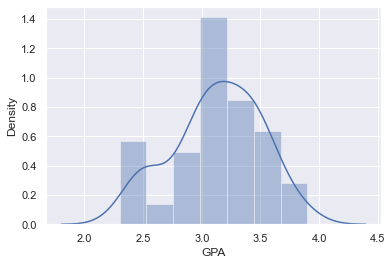

In [183]:
sns.distplot(survey["GPA"]);

In [184]:
round(survey["Salary"].mean(),2)

48.55

In [185]:
round(survey["Salary"].median(),2)

50.0

In [186]:
round(survey["Salary"].mode(),2)

0   40.00
dtype: float64

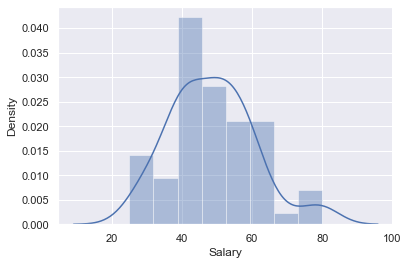

In [187]:
sns.distplot(survey["Salary"]);

In [188]:
round(survey["Spending"].mean(),2)

482.02

In [189]:
round(survey["Spending"].median(),2)

500.0

In [190]:
round(survey["Spending"].mode(),2)

0    500
dtype: int64

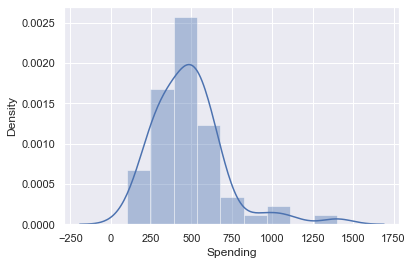

In [191]:
sns.distplot(survey["Spending"]);

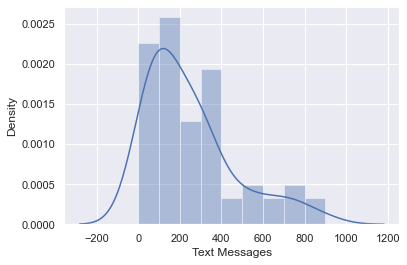

In [192]:
sns.distplot(survey["Text Messages"]);

In [193]:
round(survey["Text Messages"].mean(),2)

246.21

In [194]:
round(survey["Text Messages"].median(),2)

200.0

In [195]:
round(survey["Text Messages"].mode(),2)

0    300
dtype: int64

# ABC asphalt shingles

<b>An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.
  
<b>The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [198]:
asphaltshingles = pd.read_csv("A & B shingles.csv")

<b>Exploratory Data Analysis

In [202]:
asphaltshingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [203]:
asphaltshingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [217]:
a_data = np.array(asphaltshingles.iloc[0:,0])
a_data

array([0.44, 0.61, 0.47, 0.3 , 0.15, 0.24, 0.16, 0.2 , 0.2 , 0.2 , 0.26,
       0.14, 0.33, 0.13, 0.72, 0.51, 0.28, 0.39, 0.39, 0.25, 0.16, 0.2 ,
       0.22, 0.42, 0.24, 0.21, 0.49, 0.34, 0.36, 0.29, 0.27, 0.4 , 0.29,
       0.43, 0.34, 0.37])

In [219]:
a_mean = np.round(a_data.mean(),2)
a_std = np.round(np.std(a_data,ddof=1),2)
print("Mean is ",a_mean,"\n Std is ",a_std)

Mean is  0.32 
 Std is  0.14


In [220]:
b_data = np.array(asphaltshingles.iloc[0:31,1])
b_data

array([0.14, 0.15, 0.31, 0.16, 0.37, 0.18, 0.42, 0.58, 0.25, 0.41, 0.17,
       0.13, 0.23, 0.11, 0.1 , 0.19, 0.22, 0.44, 0.11, 0.11, 0.31, 0.43,
       0.26, 0.18, 0.44, 0.43, 0.16, 0.52, 0.36, 0.22, 0.39])

In [221]:
b_mean = np.round(b_data.mean(),2)
b_std = np.round(np.std(b_data,ddof=1),2)
print("Mean is ",b_mean,"\n Std is ",b_std)

Mean is  0.27 
 Std is  0.14


## Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

<b> For both types

<b>Step 1:  
H0 : μ <= 0.35<br>
Ha : μ > 0.35

<b>Step 2:  
Assume level of significance, alpha = 0.05

<b>Step 3:<br>
1 Sample t test will be done as population std is not known

<b>Step 4:<br>Test Statistic and p value are calculated for both the types

In [226]:
a_t_statistic, a_pvalue = stats.ttest_1samp(a_data,0.35)
print("A type test Statistic value is ",np.round(a_t_statistic,2),"\nA type p value is ",np.round(a_pvalue/2,2))
b_t_statistic, b_pvalue = stats.ttest_1samp(b_data,0.35)
print("\nB type test Statistic value is ",np.round(b_t_statistic,2),"\nB type p value is ",np.round(b_pvalue/2,4))

A type test Statistic value is  -1.47 
A type p value is  0.07

B type test Statistic value is  -3.1 
B type p value is  0.0021


<b>Step 5:
<b>Here, we can see that p value of type a is 0.07 and is greater than the level of significance (0.05).
Hence for type A, we fail to reject the null hypothesis and conclude that the mean moisture content is less than or equal to 0.35. 
    
<b>For Type B, the p value is 0.0021 and is less than the level of significance (0.05). Here, we reject the null hypothesis and conclude that the mean moisture content is greater than 0.35. Hence, the company needs to take immediate measures in the quality control process for Type B Asphalt Shingles.

## Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

<b>Step 1:  
H0 : a_mean - b_mean = 0<br>
Ha : a_mean - b_mean != 0

<b>Step 2:  
Assume level of significance, alpha = 0.05

<b>Step 3:<br>
We have two independent samples with different sample sizes.<br>
The Population std is not known.<br>
We need to compare means of the two samples.<br> 
Hence, we will perform 2 Sample unpaired t test assuming the variances of both the samples are identical. 

<b>Step 4:<br>Test Statistic and p value are calculated

In [256]:
ab_t_statistic, ab_pvalue = stats.ttest_ind(a_data,b_data)
print("Test Statistic value is ",np.round(ab_t_statistic,2),"\np value is ",np.round(ab_pvalue,2))

Test Statistic value is  1.29 
p value is  0.2


<b>Step 5:<br>
<b>Here, we can see that p value is 0.2 and is greater than the level of significance (0.05).
Hence, we fail to reject the null hypothesis and conclude that the population mean for both the types are equal